<a href="https://colab.research.google.com/github/yuxuan-xue67/Datathon2024/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import some library we may use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import numpy as np


import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

!pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

from collections import Counter



from PIL import Image, ImageOps
import os

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout, Reshape, GlobalAveragePooling1D

from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Read in both training and test data files

In [2]:

# List of training file names
pre_path = '/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Training [NEW]'

train_files = []
label_files = []

# Loop through each file in the directory
count = 0
for file_name in os.listdir(pre_path):
    if file_name.endswith('_X.npy'):
      y_file_name = file_name.replace('_X.npy', '_y.npy')
      train_files.append(pre_path + '/' + file_name)
      label_files.append(pre_path + '/' + y_file_name)
      count += 1
    if count == 12:
      break

# File name for testing
test_file_x = pre_path + '/' + 'p20_n1_NEW_X.npy'
test_file_y = pre_path + '/' + 'p20_n1_NEW_y.npy'


# Load training data and labels
X_train = np.concatenate([np.load(file) for file in train_files])
y_train = np.concatenate([np.load(file) for file in label_files])



# Load testing data and labels
X_test = np.load(test_file_x)
y_test = np.load(test_file_y)

# Randomly choose 500 data points from the original 3000 samples
random_indices = np.random.choice(3000, size=500, replace=False)

# Reshape the training data
N_train, _, _ = X_train.shape
X_train_reshaped = X_train[:, :, random_indices].reshape(N_train, -1)

# Reshape the testing data
N_test, _, _ = X_test.shape
X_test_reshaped = X_test[:, :, random_indices].reshape(N_test, -1)

# Determine the best max depth value for random forest model (Optional)

In [6]:
# Define the range of values for max_depth to test
# max_depth_values = [None, 5, 10, 15, 20]  # Adjust values based on your preference
# max_depth_values = [None, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_depth_values = [None, 10, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30]
# Initialize variables to store the best configuration
best_max_depth = None
best_accuracy = 0.0  # Set to a low value initially

# Lists to store accuracy values for plotting
depth_values = []
accuracy_values = []

# Iterate over max_depth values
for max_depth_value in max_depth_values:
    # print(max_depth_value)
    # Create a Random Forest classifier with the current max_depth value
    rf_classifier = RandomForestClassifier(max_depth=max_depth_value, random_state=42)

    # Train the model
    rf_classifier.fit(X_train_reshaped, y_train)

    # Make predictions on the test data
    predicted_labels_test = rf_classifier.predict(X_test_reshaped)

    # Evaluate the model performance
    accuracy_test = accuracy_score(y_test, predicted_labels_test)

    # Store values for plotting
    depth_values.append(max_depth_value)
    accuracy_values.append(accuracy_test)

    # Check if the current configuration is better than the previous best
    if accuracy_test > best_accuracy:
        # print("BoyNextDoor")
        best_accuracy = accuracy_test
        best_max_depth = max_depth_value

    print(max_depth_value,' :',accuracy_test, best_accuracy)

# Print the best configuration
print(f'Best max_depth: {best_max_depth}')
print(f'Accuracy on Test Data with Best Configuration: {best_accuracy}')

# Plot the graph
plt.plot(depth_values, accuracy_values, marker='o')
plt.title('Max Depth vs. Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

None  : 0.8067047075606276 0.8067047075606276
10  : 0.8833808844507846 0.8833808844507846
15  : 0.8512838801711841 0.8833808844507846
16  : 0.8470042796005706 0.8833808844507846
17  : 0.8659058487874465 0.8833808844507846
18  : 0.8245363766048502 0.8833808844507846
19  : 0.8245363766048502 0.8833808844507846
20  : 0.822039942938659 0.8833808844507846
21  : 0.8277460770328102 0.8833808844507846
22  : 0.8095577746077033 0.8833808844507846
23  : 0.8124108416547788 0.8833808844507846
24  : 0.8095577746077033 0.8833808844507846


KeyboardInterrupt: 

# Create a model by random forest and test with one data set

Accuracy on Test Data: 0.8049215406562055


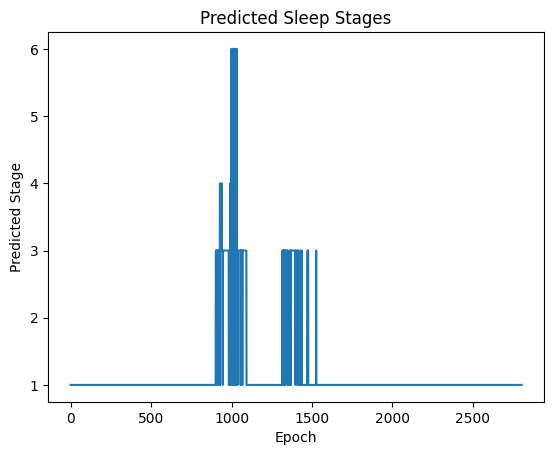

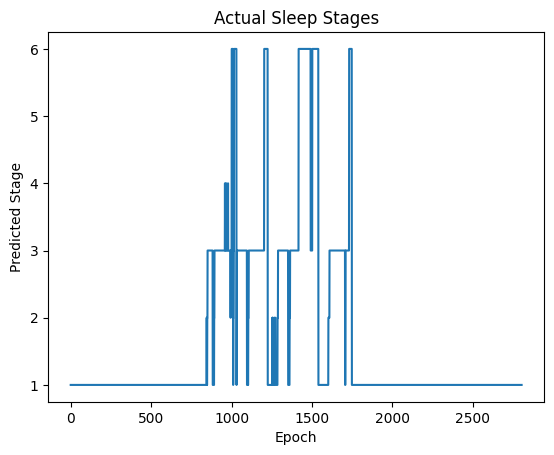

In [3]:


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_reshaped, y_train)

# Make predictions on the test data
predicted_labels_test = rf_classifier.predict(X_test_reshaped)

# Evaluate the model performance on the test data
accuracy_test = accuracy_score(y_test, predicted_labels_test)
print(f'Accuracy on Test Data: {accuracy_test}')

# Save the predicted labels for the test data
np.save('random_forest_pred_test.npy', predicted_labels_test)


plt.plot(predicted_labels_test)
plt.title('Predicted Sleep Stages')
plt.xlabel('Epoch')
plt.ylabel('Predicted Stage')
plt.show()

plt.plot(y_test)
plt.title('Actual Sleep Stages')
plt.xlabel('Epoch')
plt.ylabel('Predicted Stage')
plt.show()

# After Running and creating the model, predict the evaluation files and polt the corresponding hypnogram graphs

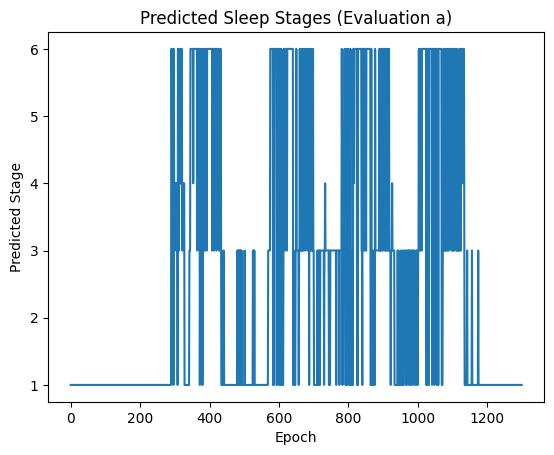

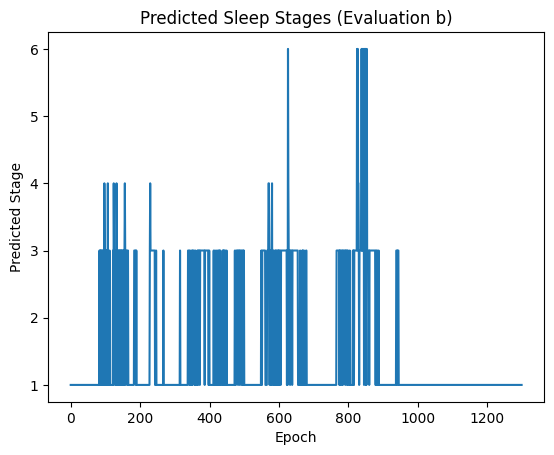

In [4]:
eval_a_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Evaluation [NEW]/eval_a_NEW_X.npy')
eval_b_X = np.load('/content/drive/My Drive/Datathon 2024/Neurotech@Rice Datathon Challenge/Evaluation [NEW]/eval_b_NEW_X.npy')

# # Assuming you have the evaluation data in X_eval
# X_eval_a_flat = eval_a_X.reshape(-1, 6 * 100)
# X_eval_b_flat = eval_b_X.reshape(-1, 6 * 100)


# # Reshape the testing data
N_test_a, _, _ = eval_a_X.shape
X_test_a_reshaped = eval_a_X[:, :, random_indices].reshape(N_test_a, -1)

N_test_b, _, _ = eval_b_X.shape
X_test_b_reshaped = eval_b_X[:, :, random_indices].reshape(N_test_b, -1)



# Make predictions on the evaluation data

predicted_labels_eval_a = rf_classifier.predict(X_test_a_reshaped)
predicted_labels_eval_b = rf_classifier.predict(X_test_b_reshaped)
# Plot the predicted sleep stages for the evaluation data
plt.plot(predicted_labels_eval_a)
plt.title('Predicted Sleep Stages (Evaluation a)')
plt.xlabel('Epoch')
plt.ylabel('Predicted Stage')
plt.show()


plt.plot(predicted_labels_eval_b)
plt.title('Predicted Sleep Stages (Evaluation b)')
plt.xlabel('Epoch')
plt.ylabel('Predicted Stage')
plt.show()